<a href="https://colab.research.google.com/github/Adaline-K/git4-collaboration-sourcetree/blob/master/image_test03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Transformation**

In [ ]:
#Homogenous Coordinate(동차좌표)
#2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현
#강체변환(유클리드 변환)-회전/이동 두요소 사용하여 이미지 변환
#유사변환-확대/축소, 회전, 이동


In [ ]:
import cv2
import matplotlib.pylab as plt
import skimage.data

img_astro= skimage.data.astronaut()
img=cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols= img.shape[:2]

#이미지의 중심점을 기준으로 90도 회전, 크기는 70%
H= cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7)

#50만큼 평행이동
#H[: 2] +=50
H


array([[  0.60621778,   0.35      ,  11.20824764],
       [ -0.35      ,   0.60621778, 190.40824764]])

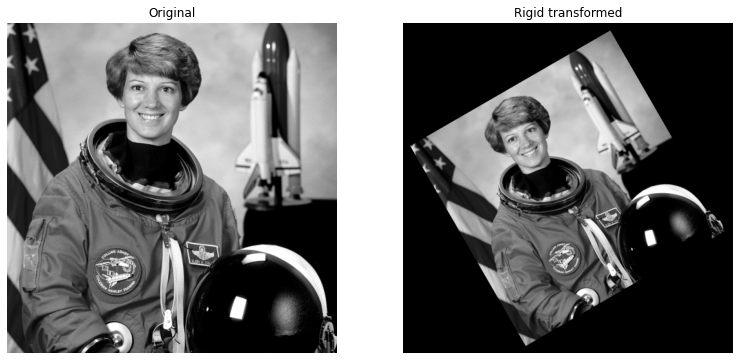

In [ ]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(13,13))
ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

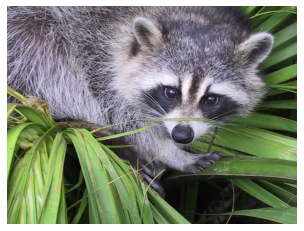

In [ ]:
#3점 어파인 변환함수
import scipy .misc
import matplotlib.pyplot as plt

face = scipy.misc.face()

plt.gray()
plt.imshow(face)
plt.axis("off")
plt.show()


In [ ]:
import cv2
import scipy .misc
import numpy as np
import matplotlib.pyplot as plt

face = scipy.misc.face()
rows, cols, ch = face.shape

pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[100, 100], [200, 500], [600, 100]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)


H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine

array([[ 8.33333333e-01,  2.50000000e-01, -1.16666667e+02],
       [-1.77635684e-17,  1.00000000e+00, -1.00000000e+02]])

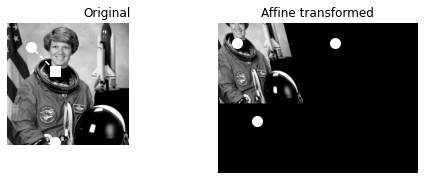

In [ ]:
img2 = cv2.warpAffine(img, H_affine, (cols, rows))

fig, [ax1, ax2] =plt.subplots(1,2)

ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")   

ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#원근변환(perspective transfrom)
#핀홀 카메라 모형 사용하여 2차원 이미지 변환하는 방법

pts1= np.float32([[200,200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600,100], [700, 500]])

H_perspective= cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

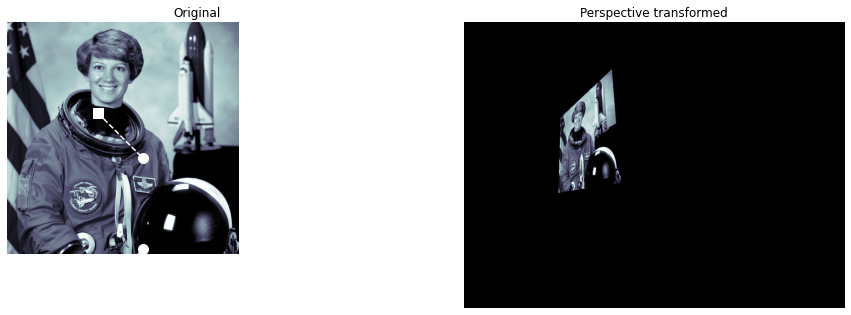

In [ ]:
img2= cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] =plt.subplots(1,2,figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap =plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.axis("off")
plt.show()